In [1]:
!pip install yfinance --upgrade


In [2]:
import yfinance as yf

# Define the ticker symbol for HDFC Bank
ticker_symbol = 'HDFCBANK.NS'

# Download data and assign it to df
df = yf.download(ticker_symbol, start="2020-01-01", end="2025-05-02")

# Display the first 5 rows
print(df.head())

# Save to CSV (optional)
df.to_csv("hdfc_bank_stock_data.csv")



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      HDFCBANK.NS  HDFCBANK.NS  HDFCBANK.NS  HDFCBANK.NS HDFCBANK.NS
Date                                                                      
2020-01-01  1227.428589  1228.772582  1219.748760  1225.028642     1836849
2020-01-02  1235.252441  1236.452415  1227.812607  1227.812607     3068583
2020-01-03  1217.636841  1233.572462  1213.028897  1230.884475     5427775
2020-01-06  1191.285400  1211.301048  1186.533553  1209.573040     5445093
2020-01-07  1210.148926  1220.564670  1202.133128  1208.517009     7362247


In [3]:
import pandas as pd


In [4]:
df=pd.read_csv('hdfc_bank_stock_data.csv')

In [5]:
df.head()


,Price,Close,High,Low,Open,Volume
0,Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,1227.4285888671875,1228.7725823160727,1219.748760227712,1225.0286424173514,1836849
3,2020-01-02,1235.25244140625,1236.4524146347387,1227.81260738962,1227.81260738962,3068583
4,2020-01-03,1217.6368408203125,1233.5724616348048,1213.0288968134041,1230.8844747666276,5427775


In [6]:
df.tail()

,Price,Close,High,Low,Open,Volume
1316,2025-04-24,1916.800048828125,1923.9000244140625,1905.0999755859375,1910.0,12965877
1317,2025-04-25,1911.199951171875,1933.0,1891.800048828125,1924.800048828125,9250439
1318,2025-04-28,1920.199951171875,1929.699951171875,1908.4000244140625,1911.199951171875,6960246
1319,2025-04-29,1908.800048828125,1928.800048828125,1900.199951171875,1918.800048828125,9459154
1320,2025-04-30,1925.0,1936.9000244140625,1910.300048828125,1913.0,15968435


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0              HDFCBANK.NS
1                      NaN
2       1227.4285888671875
3         1235.25244140625
4       1217.6368408203125
               ...        
1316     1916.800048828125
1317     1911.199951171875
1318     1920.199951171875
1319     1908.800048828125
1320                1925.0
Name: Close, Length: 1321, dtype: object

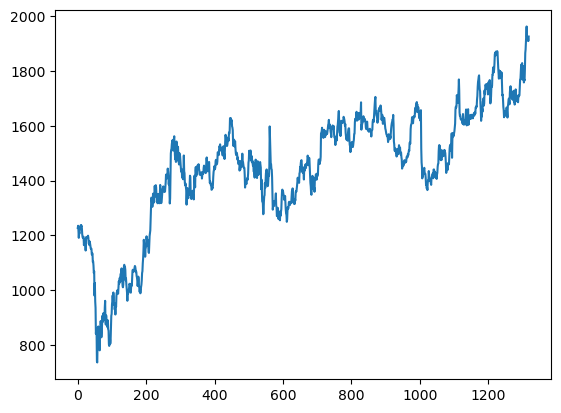

In [9]:
import matplotlib.pyplot as plt

df1 = df.iloc[2:].reset_index()['Close']  # Skip first two rows
df1 = pd.to_numeric(df1)  # Convert to numeric

plt.plot(df1)
plt.show()


In [10]:
import numpy as np

In [11]:
df1

0       1227.428589
1       1235.252441
2       1217.636841
3       1191.285400
4       1210.148926
           ...     
1314    1916.800049
1315    1911.199951
1316    1920.199951
1317    1908.800049
1318    1925.000000
Name: Close, Length: 1319, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [13]:
print(df1)

[[0.40045993]
 [0.40684819]
 [0.39246487]
 ...
 [0.96611483]
 [0.95680669]
 [0.97003412]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(857, 462)

In [16]:
train_data

array([[0.40045993],
       [0.40684819],
       [0.39246487],
       [0.37094865],
       [0.38635091],
       [0.38376433],
       [0.39481633],
       [0.40367355],
       [0.40626043],
       [0.40900379],
       [0.40488865],
       [0.40755367],
       [0.4001072 ],
       [0.38188313],
       [0.37361377],
       [0.37087031],
       [0.37400558],
       [0.37377056],
       [0.34919721],
       [0.35703569],
       [0.36695112],
       [0.35926963],
       [0.35946548],
       [0.33320708],
       [0.36220894],
       [0.3738488 ],
       [0.37004732],
       [0.37192852],
       [0.37043913],
       [0.37067426],
       [0.37725857],
       [0.37130139],
       [0.35401793],
       [0.35229341],
       [0.34923668],
       [0.36017086],
       [0.35225434],
       [0.3466498 ],
       [0.33908592],
       [0.33826293],
       [0.33841961],
       [0.3213321 ],
       [0.32286047],
       [0.32458489],
       [0.29875767],
       [0.30071731],
       [0.28782329],
       [0.266

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(756, 100)
(756,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(361, 100)
(361,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\91807\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - loss: 0.1296 - val_loss: 0.0362
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - loss: 0.0122 - val_loss: 0.0041
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - loss: 0.0046 - val_loss: 0.0090
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - loss: 0.0032 - val_loss: 0.0086
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - loss: 0.0026 - val_loss: 0.0053
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - loss: 0.0020 - val_loss: 0.0048
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.0018 - val_loss: 0.0037
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.17.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1415.2948036155258

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


1638.551683656153

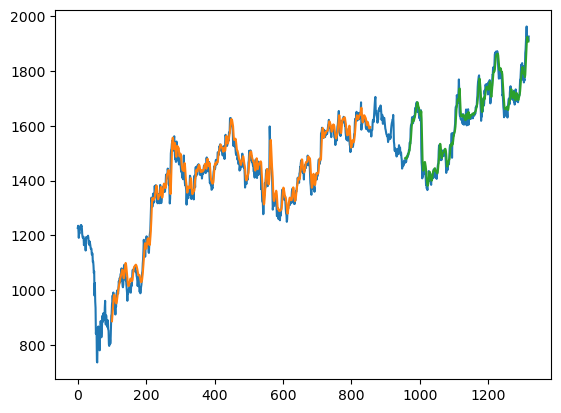

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [45]:
from sklearn.metrics import r2_score

# 1. Make predictions
y_pred = model.predict(X_test)

# 2. (Optional) Inverse transform if you scaled y values using a scaler
# Example if you used a scaler like MinMaxScaler:
# y_pred = scaler.inverse_transform(y_pred)
# ytest = scaler.inverse_transform(ytest)

# 3. Flatten both arrays for comparison
y_pred_flat = y_pred.flatten()
y_true_flat = ytest.flatten()

# 4. Calculate R² score
r2 = r2_score(y_true_flat, y_pred_flat)
print("R² Score:", r2)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
R² Score: 0.9488809401157926


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Flatten predictions and true values
y_pred_flat = y_pred.flatten()
y_true_flat = ytest.flatten()  # This was 'y_true' in your previous code

# Calculate metrics
mae = mean_absolute_error(y_true_flat, y_pred_flat)
mse = mean_squared_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 0.01795992672404727
MSE: 0.0006040708338031596
RMSE: 0.024577852505928168


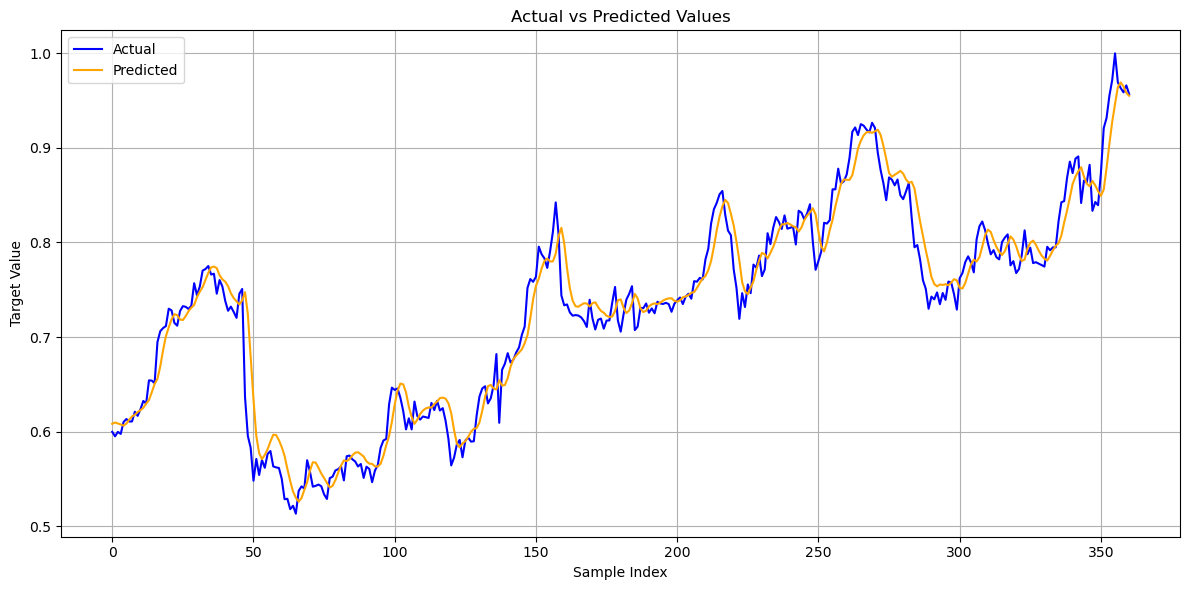

In [46]:
import matplotlib.pyplot as plt

# Flatten arrays if they aren't already
y_pred_flat = y_pred.flatten()
y_true_flat = ytest.flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_true_flat, label='Actual', color='blue')
plt.plot(y_pred_flat, label='Predicted', color='orange')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
len(test_data)

462

In [34]:
x_input=test_data[362:].reshape(1,-1)
x_input.shape


(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.9170425824726891,
 0.9216558851005077,
 0.9135724140749335,
 0.9251260534982633,
 0.9235746641625822,
 0.9194921131063991,
 0.9163485687274695,
 0.9265549463679275,
 0.921206764615665,
 0.8951193032353171,
 0.8767069581032683,
 0.8626630223386609,
 0.844699797691455,
 0.8687868489229356,
 0.8664189493760182,
 0.8604176192577602,
 0.8665414458420349,
 0.8499254829777008,
 0.8458020665422932,
 0.8538855375678671,
 0.86286714989147,
 0.8264915801122152,
 0.7948926748060203,
 0.797260574352938,
 0.7816652492526495,
 0.7600277286548787,
 0.7510052509520513,
 0.729857616546691,
 0.742717652373668,
 0.739819100926772,
 0.7471676928279016,
 0.7346750467273186,
 0.7465144447902496,
 0.7392883493551368,
 0.7585988357852145,
 0.757659829107961,
 0.7453305448526193,
 0.7290003406278867,
 0.7621506352697627,
 0.7677845756616266,
 0.7793789807925242,
 0.7852986798239898,
 0.7789298603076815,
 0.7683560929408297,
 0.8033844009372126,
 0.8171834434414431,
 0.8221232704164307,
 0.8130600270060353,
 

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.95657027]
101
1 day input [0.92165589 0.91357241 0.92512605 0.92357466 0.91949211 0.91634857
 0.92655495 0.92120676 0.8951193  0.87670696 0.86266302 0.8446998
 0.86878685 0.86641895 0.86041762 0.86654145 0.84992548 0.84580207
 0.85388554 0.86286715 0.82649158 0.79489267 0.79726057 0.78166525
 0.76002773 0.75100525 0.72985762 0.74271765 0.7398191  0.74716769
 0.73467505 0.74651444 0.73928835 0.75859884 0.75765983 0.74533054
 0.72900034 0.76215064 0.76778458 0.77937898 0.78529868 0.77892986
 0.76835609 0.8033844  0.81718344 0.82212327 0.81306003 0.79917935
 0.78746245 0.79187163 0.7844413  0.78211427 0.80048575 0.80513992
 0.80852836 0.77578632 0.78019549 0.76762121 0.77190789 0.78689083
 0.81277427 0.78758495 0.79448442 0.77815422 0.77913399 0.77754183
 0.77611294 0.77447992 0.79542343 0.79170827 0.79481104 0.79481104
 0.8223274  0.84245439 0.84376079 0.86797034 0.88548444 0.87331852
 0.88866885 0.89099589 0.84171952 0.86543918 0.86376529 0.88209601
 0.83343192 0.84278102 0.83939248 

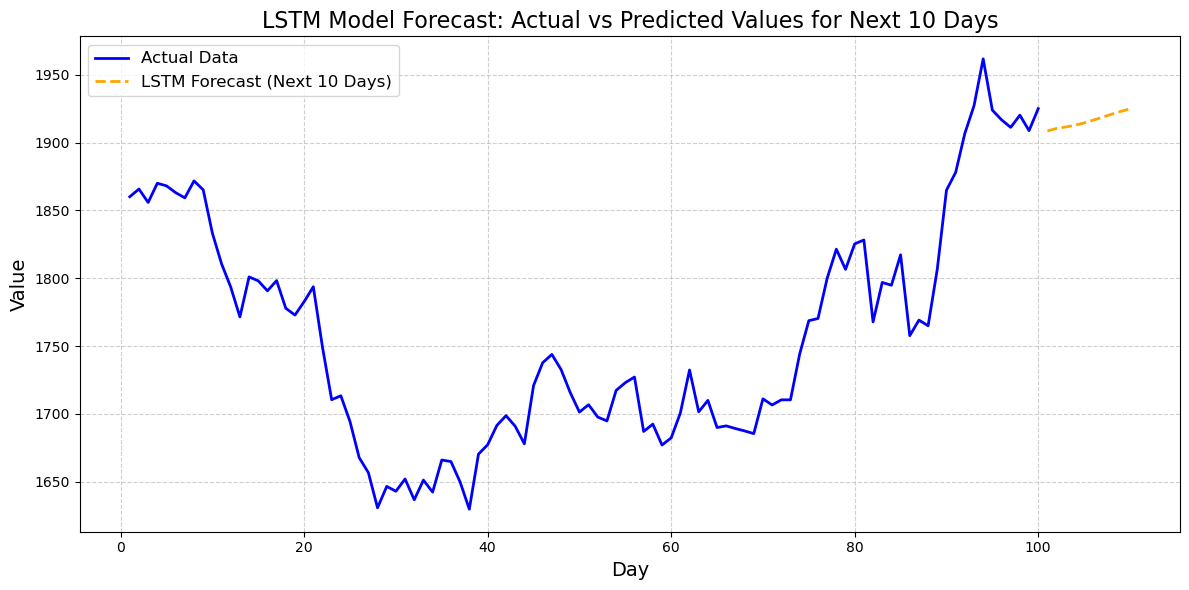

In [48]:
import matplotlib.pyplot as plt
import numpy as np

day_new = np.arange(1, 101)        # Actual data days
day_pred_10 = np.arange(101, 111)  # Forecast days (next 10 days)
lst_output_10 = lst_output[:10]     # Take first 10 predicted values

plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(day_new, scaler.inverse_transform(df1[1219:]), label='Actual Data', color='blue', linewidth=2)

# Plot predicted forecast data for next 10 days
plt.plot(day_pred_10, scaler.inverse_transform(lst_output_10), label='LSTM Forecast (Next 10 Days)', color='orange', linestyle='--', linewidth=2)

# Title with info
plt.title('LSTM Model Forecast: Actual vs Predicted Values for Next 10 Days', fontsize=16)

# Axis labels
plt.xlabel('Day', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Legend
plt.legend(fontsize=12)

# Enable grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [49]:
# Get the 10-day forecast predictions (already assumed in lst_output_10)
# Inverse transform to get actual stock prices
predicted_prices_10days = scaler.inverse_transform(lst_output_10)

# Print each day’s predicted stock price
print("Predicted Stock Prices for Next 10 Days:")
for i, price in enumerate(predicted_prices_10days, start=1):
    print(f"Day {i}: {price[0]:.2f}")



Predicted Stock Prices for Next 10 Days:
Day 1: 1908.51
Day 2: 1910.42
Day 3: 1911.50
Day 4: 1912.77
Day 5: 1914.48
Day 6: 1916.52
Day 7: 1918.72
Day 8: 1920.90
Day 9: 1922.97
Day 10: 1924.85


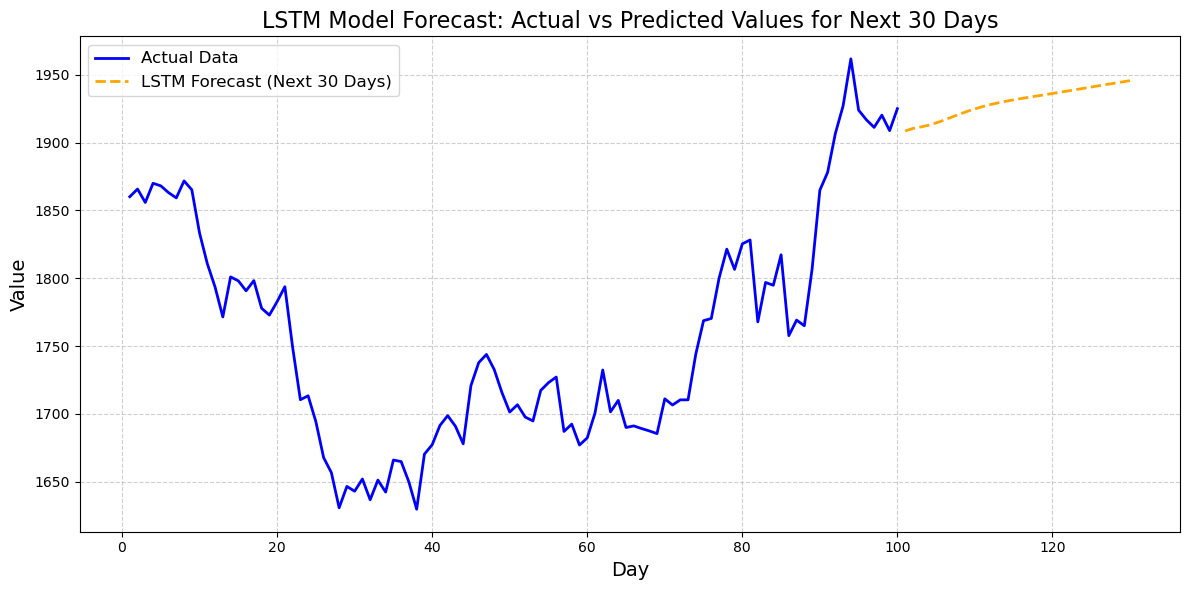

In [50]:
import matplotlib.pyplot as plt
import numpy as np

day_new = np.arange(1, 101)        # Actual data days
day_pred = np.arange(101, 131)     # Forecast days (30 days)

plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(day_new, scaler.inverse_transform(df1[1219:]), label='Actual Data', color='blue', linewidth=2)

# Plot predicted forecast data
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='LSTM Forecast (Next 30 Days)', color='orange', linestyle='--', linewidth=2)

# Title with info
plt.title('LSTM Model Forecast: Actual vs Predicted Values for Next 30 Days', fontsize=16)

# Axis labels
plt.xlabel('Day', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Legend
plt.legend(fontsize=12)

# Enable grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [51]:
# Inverse transform the 30-day forecast to original scale
predicted_prices_30days = scaler.inverse_transform(lst_output)

print("Predicted Stock Prices for Next 30 Days:")
for i, price in enumerate(predicted_prices_30days, start=1):
    print(f"Day {i}: {price[0]:.2f}")



Predicted Stock Prices for Next 30 Days:
Day 1: 1908.51
Day 2: 1910.42
Day 3: 1911.50
Day 4: 1912.77
Day 5: 1914.48
Day 6: 1916.52
Day 7: 1918.72
Day 8: 1920.90
Day 9: 1922.97
Day 10: 1924.85
Day 11: 1926.52
Day 12: 1928.00
Day 13: 1929.30
Day 14: 1930.45
Day 15: 1931.50
Day 16: 1932.48
Day 17: 1933.41
Day 18: 1934.33
Day 19: 1935.25
Day 20: 1936.18
Day 21: 1937.11
Day 22: 1938.05
Day 23: 1939.01
Day 24: 1939.97
Day 25: 1940.93
Day 26: 1941.88
Day 27: 1942.83
Day 28: 1943.77
Day 29: 1944.70
Day 30: 1945.62


In [52]:
!pip install shap

Original SHAP values shape: (5, 100, 1)
Reshaped SHAP values: (5, 100)

Waterfall plot for first sample:


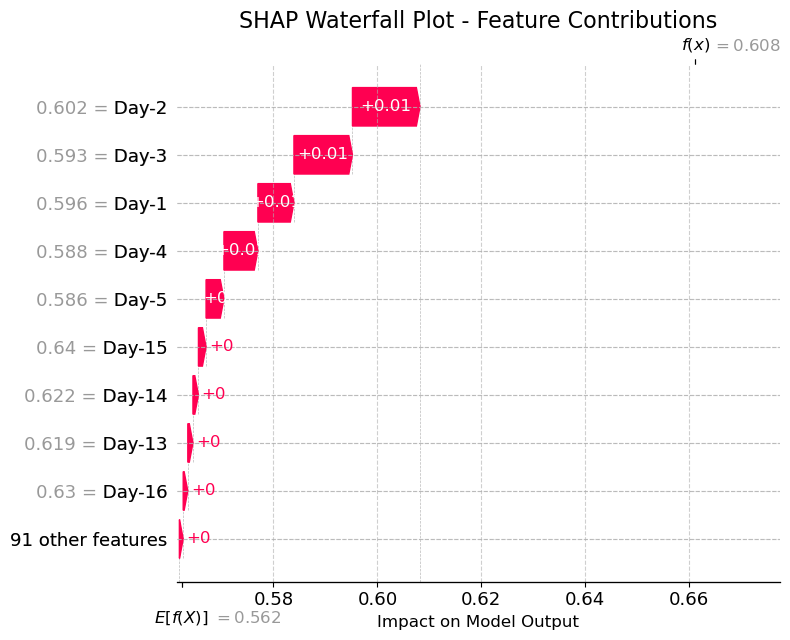

In [92]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare the SHAP data correctly
print(f"Original SHAP values shape: {np.array(shap_values).shape}")

# Reshape SHAP values to 2D (samples × features)
shap_values_2d = np.array(shap_values).reshape(len(shap_values), -1)
print(f"Reshaped SHAP values: {shap_values_2d.shape}")

# 2. Create proper feature names
feature_names = [f"Day-{i}" for i in range(time_step, 0, -1)]

# 3. Create SHAP Explanation object with adjusted base value
explanation = shap.Explanation(
    values=shap_values_2d,
    base_values=np.full(len(shap_values_2d), explainer.expected_value[0]),
    data=test_samples.reshape(len(test_samples), -1),
    feature_names=feature_names
)

# 4. Create waterfall plot with fixed axis
plt.figure(figsize=(12, 8))
print("\nWaterfall plot for first sample:")

# Get the current axis
ax = plt.gca()

# Create the waterfall plot
shap.plots.waterfall(explanation[0], show=False)

# Adjust x-axis limits to remove the gap
current_xlim = ax.get_xlim()
ax.set_xlim(current_xlim[0], current_xlim[1] * 1.1)  # Add 10% padding on right

# Customize the plot
ax.set_title("SHAP Waterfall Plot - Feature Contributions", fontsize=16)
ax.set_xlabel("Impact on Model Output", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Bar plot of mean absolute SHAP values:


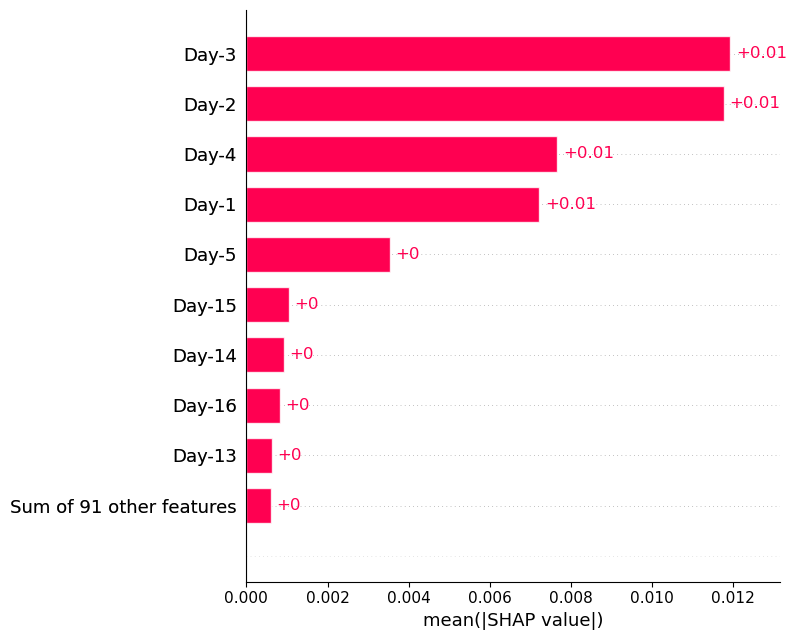

In [94]:

print("\nBar plot of mean absolute SHAP values:")
shap.plots.bar(explanation, show=False)
plt.tight_layout()
plt.show()